# Screen Time and Shopping Behavior Analysis
## Project Overview
This project explores individual screen time data in conjunction with shopping behavior to extract insights and identify patterns. The analysis includes:
- Understanding daily screen time habits.
- Exploring shopping trends and their relationship with screen time.
- Providing actionable recommendations for better digital well-being.
- Using predictive modeling to forecast screen time based on app usage categories.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Step 1: Load and Preview Data
We will load the datasets for screen time and shopping behavior, then merge them for analysis.

In [2]:
# Load the datasets
screen_time_data = pd.read_csv('screen_time.csv')
shopping_data = pd.read_csv('shopping.csv')

# Convert 'Date' column to datetime
screen_time_data['Date'] = pd.to_datetime(screen_time_data['Date'])
shopping_data['Date'] = pd.to_datetime(shopping_data['Date'])

# Merge datasets on 'Date'
merged_data = pd.merge(screen_time_data, shopping_data, on='Date', how='inner')
merged_data.head()

,Date,Social Media,Entertainment,Games,Travel,Utilities,Creativity,Productivity,Health & Fitness,Communication,Total Screen Time,Number of Purchases,Categories Bought,Amount Spent (TL)
0,2024-10-01,23,166,59,38,253,61,298,290,56,1244,4,Beauty,19828
1,2024-10-02,48,201,71,281,74,264,65,171,32,1207,1,Beauty,2851
2,2024-10-03,300,233,52,57,252,230,231,117,105,1577,2,Books,7763
3,2024-10-04,24,24,64,139,178,218,78,206,49,980,3,Electronics,5761
4,2024-10-05,85,88,33,35,162,259,287,66,20,1035,1,Clothing,6989


## Step 2: Exploratory Data Analysis (EDA)
### Correlation Matrix
Explore relationships between screen time categories and shopping behavior.

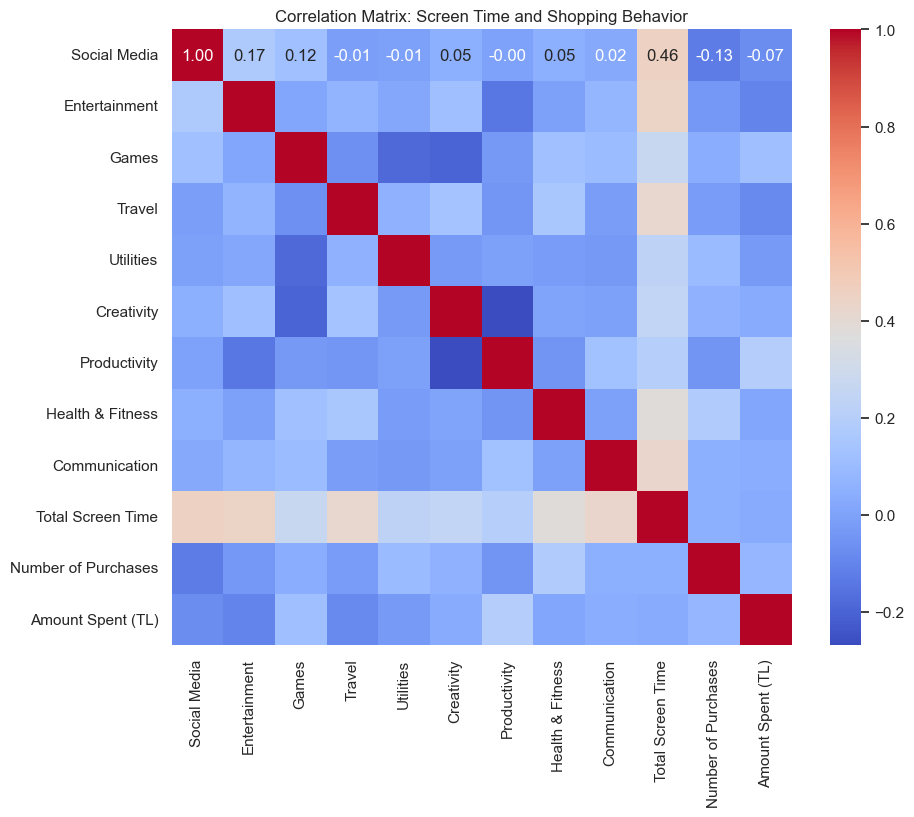

In [4]:
# Calculate correlation matrix excluding non-numeric columns
correlation_matrix = merged_data.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Screen Time and Shopping Behavior')
plt.show()

### Screen Time Distribution by App Categories
Visualize the distribution of time spent on different app categories.

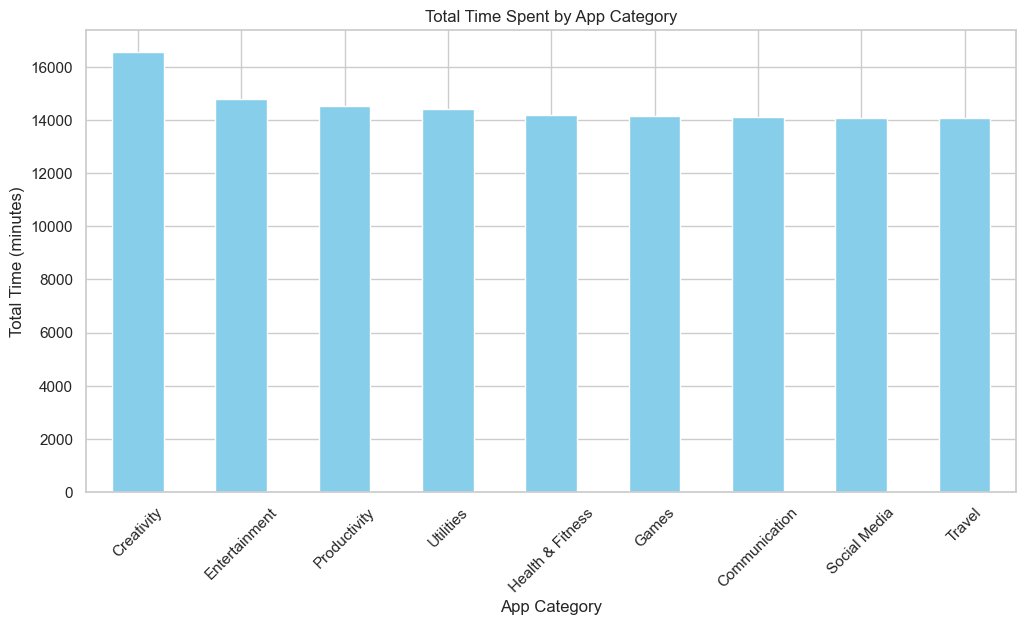

In [5]:
# Sum of time spent in each category
category_sums = screen_time_data.drop(columns=['Date', 'Total Screen Time']).sum().sort_values(ascending=False)

# Plot
category_sums.plot(kind='bar', color='skyblue')
plt.title('Total Time Spent by App Category')
plt.xlabel('App Category')
plt.ylabel('Total Time (minutes)')
plt.xticks(rotation=45)
plt.show()

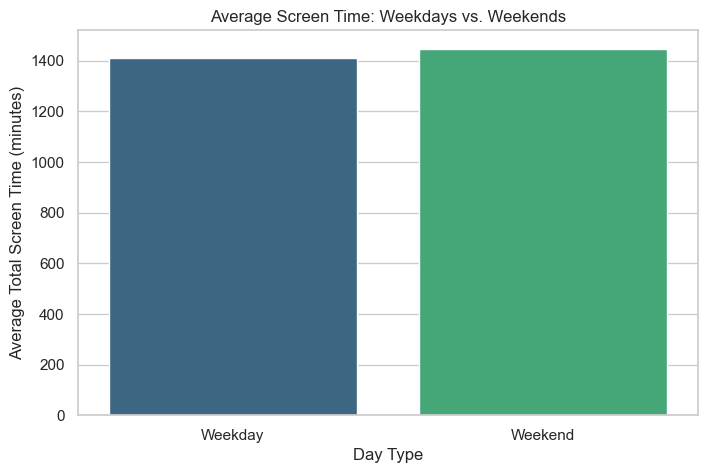

In [21]:
# Analyze screen time variation between weekdays and weekends
merged_data['Day'] = merged_data['Date'].dt.day_name()
merged_data['Is_Weekend'] = merged_data['Day'].isin(['Saturday', 'Sunday'])

# Calculate average total screen time for weekdays and weekends
avg_screen_time = merged_data.groupby('Is_Weekend')['Total Screen Time'].mean().reset_index()
avg_screen_time['Is_Weekend'] = avg_screen_time['Is_Weekend'].replace({True: 'Weekend', False: 'Weekday'})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_screen_time, x='Is_Weekend', y='Total Screen Time', palette='viridis')
plt.title('Average Screen Time: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Total Screen Time (minutes)')
plt.show()


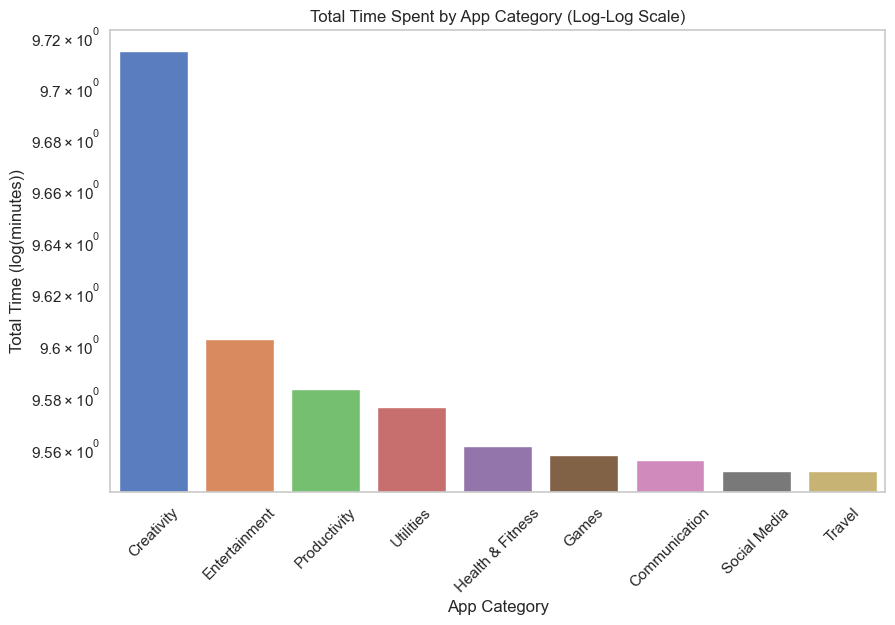

In [19]:
import numpy as np

# Identify dominant app categories
category_sums_log = np.log(screen_time_data.select_dtypes(include='number').drop(columns=['Total Screen Time']).sum().sort_values(ascending=False))

# Plot top app categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sums_log.index, y=category_sums_log.values, palette='muted')
plt.yscale('log')
plt.title('Total Time Spent by App Category (Log-Log Scale)')
plt.xlabel('App Category')
plt.ylabel('Total Time (log(minutes))')
plt.xticks(rotation=45)
plt.show()


## Step 3: Predictive Modeling
We will use a Random Forest Regressor to predict total screen time based on category usage.

In [6]:
# Prepare data for modeling
X = screen_time_data.drop(columns=['Date', 'Total Screen Time'])
y = screen_time_data['Total Screen Time']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 32835.30363214286


## Step 4: Insights and Recommendations
### Insights
- Correlation analysis reveals strong relationships between certain app categories and shopping behavior.
- Social Media and Entertainment apps dominate screen time usage.

### Recommendations
- **Limit Social Media Usage**: Set daily limits to reduce distractions and enhance productivity.  
- **Optimize Weekend Screen Time**: Plan offline activities to balance digital and real-world interactions.  
- **Encourage Fitness Breaks**: Increase the use of Health & Fitness apps and schedule regular physical activities.  
- **Enhance Digital Curfew**: Implement a no-screen policy at least one hour before bedtime for better sleep quality.  
- **Track and Set Goals**: Use weekly reports to monitor and gradually reduce excessive screen time in dominant categories.  
- **Balance Creativity and Entertainment**: Allocate specific time slots to avoid overuse of either category.  